# Why risk aversion matters

Suppose an investor wants to maximize its portfolio return, considering two assets:
- Risk-free asset with fixed return $r_f$
- Bitcoin with return $r_{BTC}$ and volatility $\sigma_b$

The objective function is : 
$$
\max_{w1, w2} \; w_{BTC} r_{BTC} + w_{rf} r_f
$$

Further assume $r_f=1\%$

### Import packages

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get data

We can type on Google "Bitcoin price", look around, find the data, download it and load from csv file $\rightarrow$ very inefficient!

Or, we use yfinance library on Python $\rightarrow$ faster and replicable!

In [6]:

# Try download with period (most reliable)
btc = yf.download("BTC-USD", period="5y", interval="1d", auto_adjust=True,
                   progress=False, threads=False)


btc_close = btc["Close"]
print(aapl_close.head())

Ticker           BTC-USD
Date                    
2020-10-15  11495.349609
2020-10-16  11322.123047
2020-10-17  11358.101562
2020-10-18  11483.359375
2020-10-19  11742.037109


# Compute BTC returns

In general, the return of an asset is $R_t = \log(P_t) - \log(P_{t-1})$

In [67]:
btc_ret = np.log(btc_close).diff().dropna()
rf = 0.01
annualized_return_log = np.exp(btc_ret.sum() * (365 / len(btc_ret))) - 1


df = pd.DataFrame(index=['Mean'], columns=["BTC", "Rf"])
df.iloc[0, :] = np.asarray([np.round(annualized_return_log.mean(),3), rf])

print(df)

        BTC    Rf
Mean  0.576  0.01


# Optimal portfolio

Based on the maximization problem above, an investor should set $w_{BTC}=1$ $\rightarrow$ fully invested in Bitcoin

Is this what we observe in reality? No!

Investors care about risk as well

In [69]:
annualized_variance= np.sqrt(btc_ret.var(ddof=1) * 365)

df = pd.DataFrame(index=['Mean (%)', 'Standard Deviation (%)'], columns=["BTC", "Rf"])
df.iloc[0, :] = np.asarray([np.round(annualized_return_log.mean(),3)*100, rf * 100])
df.iloc[1, :] = np.asarray([np.round(annualized_variance[0], 3)*100, 0.0])
print(df)

                         BTC   Rf
Mean (%)                57.6  1.0
Standard Deviation (%)  59.3  0.0


# Comment 

Bitcoint has high (expected) returns but high standard deviation.

An investor that care not only about returns but also about risk (a risk-averse investors) would combine the two assets optimally based on:
- Excess return of BTC on $R_f$
- Risk of BTC returns $\sigma_{BTC}$
- Degree of risk aversion $\gamma w$

Let's consider the CARA portfolio problem

$$ U(W) = \frac{1- e^{-cW}}{c} $$

Optimal portfolio is:

$$ w^* =\frac{\mu_{BTC} - R_f}{c \sigma^2_{BTC}} $$

Consider $c=1$

In [57]:
c = 1
w = (annualized_return_log.mean() - 0.01) / (c * annualized_variance[0])

print("Portfolio weights: ", np.round(w,3), np.round((1-w),3))

Portfolio weights:  0.955 0.045


As soon as risk-aversion is considered some wealth is invested in the risk-free asset 

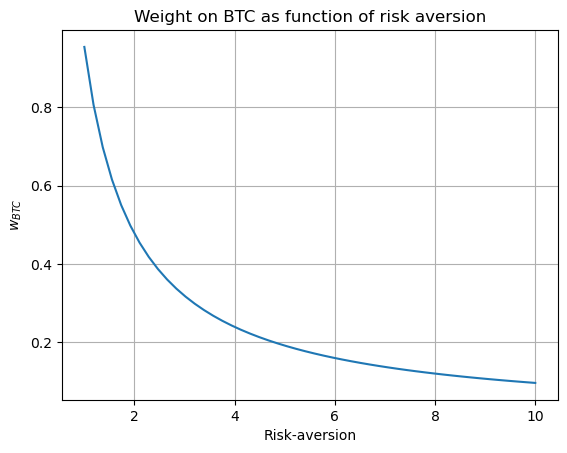

In [63]:
c = np.linspace(1, 10)

w = [ (annualized_return_log.mean() - 0.01) / (ci * annualized_variance[0]) for ci in c]

plt.plot(c, w)
plt.xlabel("Risk-aversion")
plt.ylabel(r"$w_{BTC}$")
plt.title("Weight on BTC as function of risk aversion")
plt.grid(True)
plt.show()
